# Part 1: A little visualization exercise

### Downloading (using urllib) and Reading data
#### Libraries

In [1]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os


#### Downlading data:
As the urls differ only by a number at end of each data name, this can be less coding:  

In [2]:
for i in range(1,5):
    url = "https://raw.githubusercontent.com/suneman/socialdata2021/master/files/data"+str(i)+".tsv"
    fileName = "data"+str(i)+".tsv"
    data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','Datasets', fileName))    
    filedata = urlopen(url)
    datatowrite = filedata.read()
    with open(data_dir, 'wb') as f:
        f.write(datatowrite)

#### Reading data:
As the data names differ only by a number this also can be less coding:  

In [3]:
Data = []
for i in range(1,5):
    fileName = "data"+str(i)+".tsv"
    data_dir = os.path.abspath(os.path.join(os.getcwd(),'..','Datasets', fileName))
    Data.append(pd.read_csv(data_dir,sep='\t',header=None))

Using the numpy function mean, calculate the mean of both 𝑥 -values and  𝑦 -values for each dataset: Use python string formatting to print precisely two decimal places of these results to the output cell. Check out this stackoverflow page for help with the string formatting.

In [4]:
for i,data in enumerate(Data): 
    x_mean = np.mean(data.iloc[:,0])
    y_mean = np.mean(data.iloc[:,1])
    print("data{}:\n    x_mean = {:.2f}\n    y_mean = {:.2f}".format(i+1,x_mean,y_mean))


data1:
    x_mean = 9.00
    y_mean = 7.50
data2:
    x_mean = 9.00
    y_mean = 7.50
data3:
    x_mean = 9.00
    y_mean = 7.50
data4:
    x_mean = 9.00
    y_mean = 7.50


#### Now calculate the variance for all of the various sets of 𝑥 - and  𝑦 -values (to three decimal places).

In [5]:
for i,data in enumerate(Data): 
    x_mean = np.var(data.iloc[:,0])
    y_mean = np.var(data.iloc[:,1])
    print("data{}:\n    x_var = {:.3f}\n    y_var = {:.3f}".format(i+1,x_mean,y_mean))


data1:
    x_var = 10.000
    y_var = 3.752
data2:
    x_var = 10.000
    y_var = 3.752
data3:
    x_var = 10.000
    y_var = 3.748
data4:
    x_var = 10.000
    y_var = 3.748


#### Use numpy to calculate the Pearson correlation between 𝑥 - and  𝑦 -values for all four data sets (also to three decimal places).T

In [6]:
for i,data in enumerate(Data): 
    PCC = np.corrcoef(data.iloc[:,0], data.iloc[:,1])
    print("data{}:".format(i+1))
    print(PCC)
    print()



data1:
[[1.         0.81642052]
 [0.81642052 1.        ]]

data2:
[[1.         0.81623651]
 [0.81623651 1.        ]]

data3:
[[1.         0.81628674]
 [0.81628674 1.        ]]

data4:
[[1.         0.81652144]
 [0.81652144 1.        ]]



#### The next step is use linear regression:
to fit a straight line  𝑓(𝑥)=𝑎𝑥+𝑏  through each dataset and report  𝑎  and  𝑏: (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this from scipy import stats slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [7]:
Slope = []
Intercept = []
for i,data in enumerate(Data): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.iloc[:,0],data.iloc[:,1])
    Slope.append(slope)
    Intercept.append(intercept)
    print("data{}:".format(i+1))
    print("     a-slope = {:.3f}".format(slope))
    print("     b-intercept = {:.3f}\n".format(intercept))


data1:
     a-slope = 0.500
     b-intercept = 3.000

data2:
     a-slope = 0.500
     b-intercept = 3.001

data3:
     a-slope = 0.500
     b-intercept = 3.002

data4:
     a-slope = 0.500
     b-intercept = 3.002



#### Finally,
it's time to plot the four datasets using matplotlib.pyplot.
Use a two-by-two subplot 
to put all of the plots nicely in a grid
and use the same  𝑥  and  𝑦 
range for all four plots.
And include the linear fit in all four plots.
(To get a sense of what I think the plot should look like,
you can take a look at my version [here](
https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png))

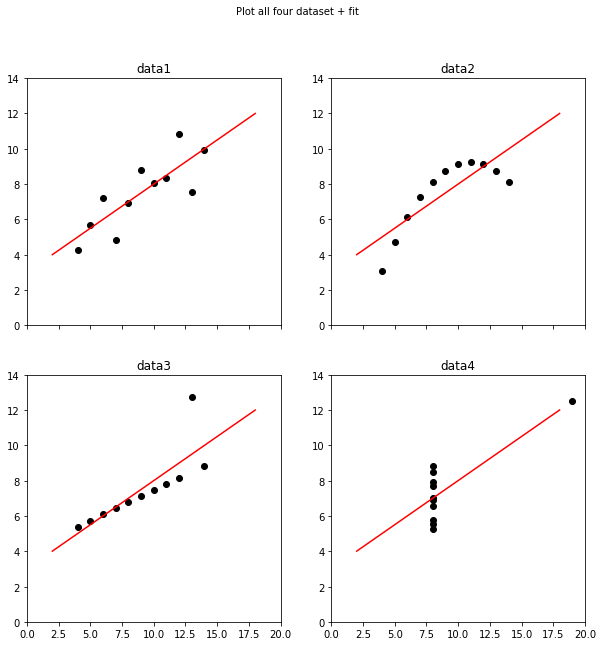

In [8]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10), sharex=True)
fig.suptitle('Plot all four dataset + fit', fontsize=10)
linespace = np.linspace(2,18,2) # to follow the given graph
for i,ax in enumerate(axs.flat):
    ax.set(title="data"+str(i+1), xlim=[0, 20],ylim=[0,14])
    x = Data[i].iloc[:,0]
    y = Data[i].iloc[:,1]
    ax.plot(x,y,'ko')
    ax.plot(linespace,Slope[i]*linespace+Intercept[i],'r-')


#### Explain - in your own words - what you think my point with this exercise is (see below for tips on this)?
Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
Here you can also get an explanation of why the datasets are actually famous - 
I mean they have their own wikipedia page!!
And the video below generalizes in the coolest way imaginable.
It's a treat, but don't watch it until after you've done the exercises and read the wikipedia page.
* [Video](https://www.youtube.com/watch?v=DbJyPELmhJc&ab_channel=AutodeskResearch).